In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
file_path = '/Users/Dracarys/Documents/data/'

In [7]:
%time trump_tweets = pd.read_csv(file_path + 'trump_tweets.csv', engine='python')

CPU times: user 2min 15s, sys: 1min 52s, total: 4min 8s
Wall time: 17min 6s


In [3]:
%time trump_tweets = pd.read_csv(open(file_path + 'trump_tweets.csv', 'rU'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


CPU times: user 19.3 s, sys: 2.48 s, total: 21.8 s
Wall time: 22.9 s


In [3]:
trump_tweets = pd.read_csv(open(file_path + 'trump_tweets.csv'))

In [4]:
sample_size = 10**4
sample = trump_tweets.text[:sample_size]

In [5]:
wordcloud = WordCloud().generate(' '.join(sample) )

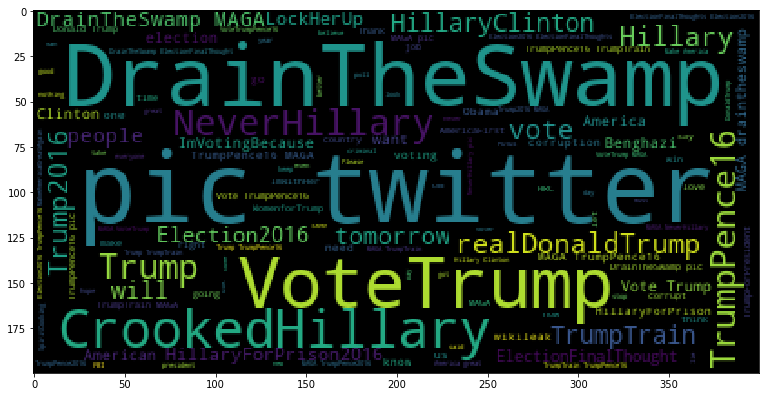

In [6]:
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud)

In [7]:
def display_top_words(vectorizer, documents, n=15):
    '''display the top n most important words for this vectorizer with given pandas Series'''
    matrix = vectorizer.fit_transform(documents)
    terms = vectorizer.get_feature_names()
    
    print('There are %d feature names.' % len(terms) )
    count = 0
    summation = -matrix.sum(axis=0)
    for index in np.argsort(summation).flat:
        count += 1
        if count > n:
            return
        
        print('%s \t %f' % (terms[index].ljust(25, ' '), -summation[0, index]) )

In [8]:
tfidf_vect = TfidfVectorizer()
display_top_words(tfidf_vect, sample, n=50)

There are 13957 feature names.
draintheswamp             	 448.715248
trumppence16              	 371.360423
maga                      	 330.915081
the                       	 314.592406
votetrump                 	 287.048138
to                        	 270.141845
trumptrain                	 262.357946
trump                     	 261.248877
twitter                   	 255.975864
pic                       	 253.419443
com                       	 252.708793
neverhillary              	 241.150393
for                       	 225.777221
trump2016                 	 222.659373
vote                      	 222.330012
electionfinalthoughts     	 207.597114
is                        	 204.820728
and                       	 195.432774
you                       	 190.061300
crookedhillary            	 185.465786
election2016              	 172.599393
realdonaldtrump           	 159.161698
in                        	 156.698132
of                        	 150.852940
we                        	 140.7

In [9]:
tfidf_vect = TfidfVectorizer(stop_words='english')
display_top_words(tfidf_vect, sample, n=50)

There are 13689 feature names.
draintheswamp             	 483.616705
trumppence16              	 406.948149
maga                      	 357.294373
votetrump                 	 309.560342
trump                     	 288.058115
trumptrain                	 282.263138
twitter                   	 270.174491
pic                       	 267.285462
com                       	 266.351843
neverhillary              	 262.760494
vote                      	 256.488161
trump2016                 	 239.537303
electionfinalthoughts     	 220.717201
crookedhillary            	 202.708720
election2016              	 183.610969
realdonaldtrump           	 176.050875
hillary                   	 157.471236
lockherup                 	 122.213784
america                   	 118.747631
hillaryforprison2016      	 116.900902
hillaryclinton            	 116.334686
makeamericagreatagain     	 116.021508
tomorrow                  	 109.436361
imvotingbecause           	 99.210334
maga3x                    	 92.148

After examing the default TfidfVectorizer, I think the resulting text is much cleaner. We could try to just add stop_words list. to filter out some not necessary ones

In [25]:
len(text.ENGLISH_STOP_WORDS)

318

In [29]:
len(stopwords.words('english') )

153

It seems scikit's stopwords list longer, so I think it's better

In [14]:
tweet_stop_words = text.ENGLISH_STOP_WORDS.union(['twitter', 'pic', 'com', 'vote', 'just', 'let', 'voting', 'rt'])

In [16]:
tfidf_vect = TfidfVectorizer(stop_words=tweet_stop_words )
display_top_words(tfidf_vect, sample, n=50)

There are 13681 feature names.
draintheswamp             	 489.222101
trumppence16              	 419.154280
maga                      	 363.572563
votetrump                 	 313.598744
trump                     	 295.195216
trumptrain                	 286.245885
neverhillary              	 266.173878
trump2016                 	 243.891372
electionfinalthoughts     	 224.505324
crookedhillary            	 205.427311
election2016              	 186.604932
realdonaldtrump           	 179.866589
hillary                   	 159.584764
lockherup                 	 123.468340
america                   	 120.956334
hillaryforprison2016      	 119.080895
makeamericagreatagain     	 118.977846
hillaryclinton            	 117.831936
tomorrow                  	 112.492226
imvotingbecause           	 100.690958
maga3x                    	 93.723071
hillaryforprison          	 85.771603
clinton                   	 83.744259
people                    	 79.455181
don                       	 78.770432

For the sake of speed and make things simple, the default's tokenizer looks pretty good and better with our additional stop words. Therefore, we will just keep it.

List of additional stop_words:

'twitter', 'pic', 'com', 'vote', 'just', 'let', 'voting', 'rt', 'imvotingbecause', 'election', 'want', 'country'

In [23]:
tweet_stop_words = text.ENGLISH_STOP_WORDS.union(['twitter', 'pic', 'com', 'vote', 'just', 'let', 'voting', 'rt', 'imvotingbecause', 'election', 'want', 'country'])

In [24]:
tfidf_vect = TfidfVectorizer(stop_words=tweet_stop_words )
display_top_words(tfidf_vect, sample, n=100)

There are 13677 feature names.
draintheswamp             	 491.722228
trumppence16              	 421.010635
maga                      	 365.469059
votetrump                 	 315.312132
trump                     	 296.559538
trumptrain                	 287.264914
neverhillary              	 267.505035
trump2016                 	 244.857567
electionfinalthoughts     	 226.473989
crookedhillary            	 206.148703
election2016              	 187.556680
realdonaldtrump           	 180.722309
hillary                   	 160.259177
lockherup                 	 123.911154
america                   	 121.715452
hillaryforprison2016      	 119.943315
makeamericagreatagain     	 119.578454
hillaryclinton            	 118.206365
tomorrow                  	 113.129745
maga3x                    	 93.963177
hillaryforprison          	 86.130035
clinton                   	 84.277309
people                    	 80.140567
don                       	 79.702612
trumppence2016            	 77.004206


Let's expand the list larger to see:

In [25]:
sample_size = 10**5
sample = trump_tweets.text[:sample_size]

In [26]:
tfidf_vect = TfidfVectorizer(stop_words=tweet_stop_words )
display_top_words(tfidf_vect, sample, n=100)

There are 36355 feature names.
unleashed                 	 11227.775657
chaos                     	 11226.845167
reveres                   	 7977.774749
paul                      	 7977.301192
100                       	 7974.830098
change                    	 7974.154199
million                   	 7973.926132
join                      	 7972.282629
need                      	 7967.359267
jamescomeyfbi             	 6957.569113
cnnbrk                    	 6957.458567
abcnews                   	 6957.432944
nbcnews                   	 6956.752974
cbsnews                   	 6956.279967
msnbc                     	 6954.959023
foxnews                   	 6953.990929
cnn                       	 6951.117025
fbi                       	 6949.118555
draintheswamp             	 2382.886179
trumppence16              	 1807.058085
maga                      	 1744.831441
trump                     	 1378.660413
neverhillary              	 1350.731320
votetrump                 	 1295.458282
trumptr

Let's test with hillary's one.

In [27]:
hillary_df = pd.read_csv(open(file_path + 'hillary_tweets.csv'))

In [28]:
hills = hillary_df.text[:sample_size]

Baseline:

In [29]:
tfidf_vect = TfidfVectorizer(stop_words='english' )
display_top_words(tfidf_vect, sample, n=100)

There are 36367 feature names.
election                  	 12968.472231
unleashed                 	 10085.745762
chaos                     	 10084.965262
reveres                   	 7659.498169
paul                      	 7659.083603
100                       	 7657.005692
million                   	 7656.097244
change                    	 7655.882974
join                      	 7654.474603
need                      	 7650.347201
jamescomeyfbi             	 6957.540902
cnnbrk                    	 6957.451792
abcnews                   	 6957.410358
nbcnews                   	 6956.679170
cbsnews                   	 6956.183240
msnbc                     	 6954.825701
foxnews                   	 6953.497981
cnn                       	 6950.019301
fbi                       	 6948.367490
draintheswamp             	 2341.791117
trumppence16              	 1754.910376
maga                      	 1707.652505
trump                     	 1341.765351
neverhillary              	 1327.866624
votetr

In [30]:
tfidf_vect = TfidfVectorizer(stop_words=tweet_stop_words )
display_top_words(tfidf_vect, sample, n=100)

There are 36355 feature names.
unleashed                 	 11227.775657
chaos                     	 11226.845167
reveres                   	 7977.774749
paul                      	 7977.301192
100                       	 7974.830098
change                    	 7974.154199
million                   	 7973.926132
join                      	 7972.282629
need                      	 7967.359267
jamescomeyfbi             	 6957.569113
cnnbrk                    	 6957.458567
abcnews                   	 6957.432944
nbcnews                   	 6956.752974
cbsnews                   	 6956.279967
msnbc                     	 6954.959023
foxnews                   	 6953.990929
cnn                       	 6951.117025
fbi                       	 6949.118555
draintheswamp             	 2382.886179
trumppence16              	 1807.058085
maga                      	 1744.831441
trump                     	 1378.660413
neverhillary              	 1350.731320
votetrump                 	 1295.458282
trumptr